<a href="https://colab.research.google.com/github/akshitanegi0908/NETWORK_IDS/blob/main/akshita_mp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing Important Libraries**

In [ ]:
pip install pandas numpy scikit-learn lightgbm imblearn matplotlib seaborn imbalanced-learn dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 3.6 MB/s eta 0:00:00


# **Importing Important Libraries**



Importing essential libraries like **pandas**, **numpy**, and **scikit-learn** provides tools for data manipulation, analysis, and building machine learning models. These libraries streamline tasks like preprocessing, visualization, and model evaluation.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns

Step 1: Load Dataset

Loading a dataset involves importing data from a file (e.g., CSV, Excel) into a structured format like a DataFrame using libraries like **pandas**. This step allows for easy exploration, manipulation, and preparation of the data for analysis and modeling.

In [ ]:
file_path = "CICIDS2017_sample_km (1).csv"
df = pd.read_csv(file_path)

# **Preprocessing**


Preprocessing involves transforming raw data into a clean and usable format by handling missing values, scaling features, and encoding categorical variables. It ensures the data is well-suited for machine learning models, improving accuracy and efficiency.

Step 2: Handle NaN values

Handling NaN values involves replacing missing data with appropriate strategies like mean, median, mode, or using advanced techniques such as interpolation or imputation. This step ensures the dataset is complete and avoids issues during model training.

In [ ]:
df['Label'].fillna(df['Label'].mode()[0], inplace=True)
X = df.drop(['Label'], axis=1)
y = df['Label']

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

<ipython-input-5-553ad7f4761c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Label'].fillna(df['Label'].mode()[0], inplace=True)


# **Feature Selection**

Step 3: Feature Selection (SelectKBest)


Feature selection is the process of identifying and selecting the most relevant features in a dataset that contribute significantly to the target variable. It helps improve model performance, reduce overfitting, and enhance interpretability by eliminating redundant or irrelevant features.

In [ ]:

k_best_selector = SelectKBest(score_func=f_classif, k=20)  # Select top 20 features
X_k_best = k_best_selector.fit_transform(X, y)

# Get selected feature names
selected_features_kbest = X.columns[k_best_selector.get_support()]

print("\nTop 20 Features (SelectKBest):")
print(selected_features_kbest)

# For simplicity, use SelectKBest features for subsequent analysis
X = X[selected_features_kbest]


Top 20 Features (SelectKBest):
Index(['Flow Duration', 'Bwd Packet Length Max', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow IAT Std', 'Flow IAT Max',
       'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'PSH Flag Count', 'ACK Flag Count', 'Average Packet Size',
       'Avg Bwd Segment Size', 'Idle Mean', 'Idle Max', 'Idle Min'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [13 14 30 32 44 49 55 56 57 58 59 60] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Step 4: Display Dataset after Preprocessing and Feature Selection

In [ ]:
print("\nDataset After Preprocessing and Feature Selection:")
print(X.head())
print("\nShape of the Processed Dataset:")
print(f"Features: {X.shape[1]}, Samples: {X.shape[0]}")


Dataset After Preprocessing and Feature Selection:
   Flow Duration  Bwd Packet Length Max  Bwd Packet Length Mean  \
0   5.416666e-07               0.000307                0.001034   
1   5.416666e-07               0.000307                0.001034   
2   4.416666e-07               0.000307                0.001034   
3   7.499999e-07               0.000307                0.001034   
4   7.249999e-07               0.000307                0.001034   

   Bwd Packet Length Std  Flow IAT Std  Flow IAT Max  Fwd IAT Total  \
0                    0.0           0.0  5.416666e-07            0.0   
1                    0.0           0.0  5.416666e-07            0.0   
2                    0.0           0.0  4.416666e-07            0.0   
3                    0.0           0.0  7.499999e-07            0.0   
4                    0.0           0.0  7.249999e-07            0.0   

   Fwd IAT Std  Fwd IAT Max  Max Packet Length  Packet Length Mean  \
0          0.0          0.0           0.000242  

# Train - Test - Split

Step 5: Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 6: Handle Imbalanced Data


In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

Step 7: Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 8: Train and Evaluate Models

In [ ]:
results = {}

Logistic Regression

Logistic Regression is a linear model for binary or multi-class classification. It uses a logistic function to estimate probabilities and assigns the class with the highest probability. It is easy to interpret, computationally efficient, and works well with linearly separable data but struggles with complex relationships.

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, lr_pred),
    'classification_report': classification_report(y_test, lr_pred, output_dict=True),
    'confusion_matrix': confusion_matrix(y_test, lr_pred)
}

Random Forest

Random Forest is an ensemble learning method combining multiple decision trees to improve accuracy and robustness. Each tree is trained on a random subset of data, and predictions are aggregated (majority voting). It handles non-linearity, avoids overfitting, and provides feature importance insights.

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, rf_pred),
    'classification_report': classification_report(y_test, rf_pred, output_dict=True),
    'confusion_matrix': confusion_matrix(y_test, rf_pred)
}

Support Vector Machine

SVM is a supervised learning model that finds the hyperplane maximizing the margin between classes. It performs well in high-dimensional spaces and can handle non-linearity using kernels. SVM is effective for small datasets but may require significant computation and parameter tuning for large datasets.

In [ ]:
svm = SVC(max_iter=10000)  # Increased max_iter
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
results['Support Vector Machine'] = {
    'accuracy': accuracy_score(y_test, svm_pred),
    'classification_report': classification_report(y_test, svm_pred, output_dict=True),
    'confusion_matrix': confusion_matrix(y_test, svm_pred)
}

LightGBM

LightGBM (Light Gradient Boosting Machine) is a gradient-boosting framework optimized for speed and efficiency. It builds decision trees leaf-wise, leading to faster convergence and higher accuracy. LightGBM excels with large datasets, supports categorical features, and reduces memory usage, making it ideal for large-scale problems.

In [ ]:
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
results['LightGBM'] = {
    'accuracy': accuracy_score(y_test, lgbm_pred),
    'classification_report': classification_report(y_test, lgbm_pred, output_dict=True),
    'confusion_matrix': confusion_matrix(y_test, lgbm_pred)
}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4601
[LightGBM] [Info] Number of data points in the train set: 21716, number of used features: 20
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


*Step* 9: Displaying Confusion Matrices


Confusion Matrices:

Logistic Regression:
[[972 343  15  48]
 [  0  12   0   0]
 [ 31  32 208   0]
 [  0   0   0 154]]


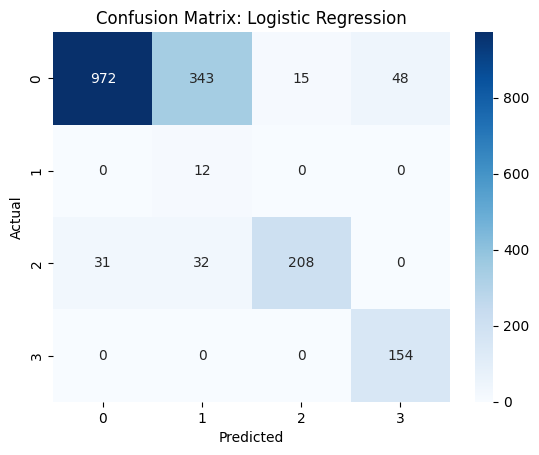


Random Forest:
[[1339   18   21    0]
 [   0   12    0    0]
 [   2    0  269    0]
 [   1    0    0  153]]


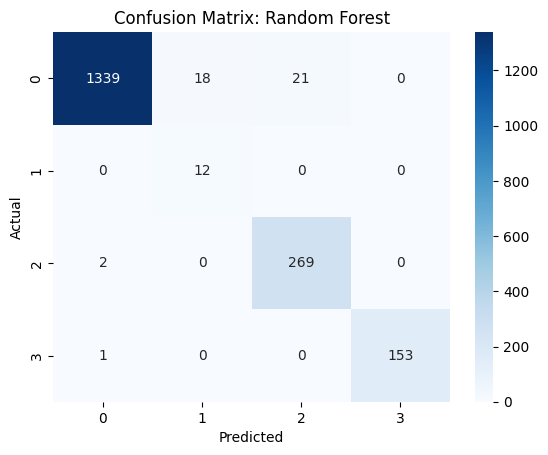


Support Vector Machine:
[[987 327  22  42]
 [  0  12   0   0]
 [ 15  32 224   0]
 [  1   0   0 153]]


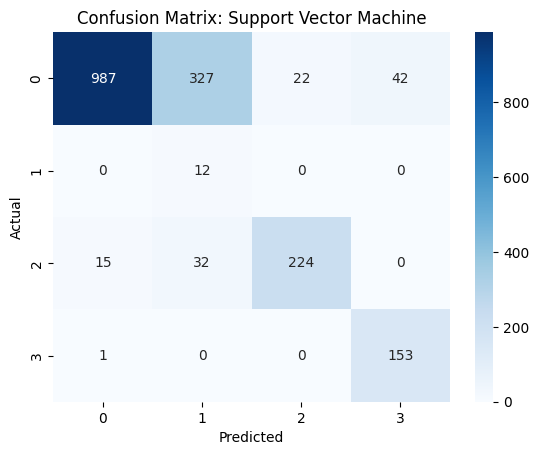


LightGBM:
[[1336   20   22    0]
 [   0   12    0    0]
 [   2    0  269    0]
 [   1    0    0  153]]


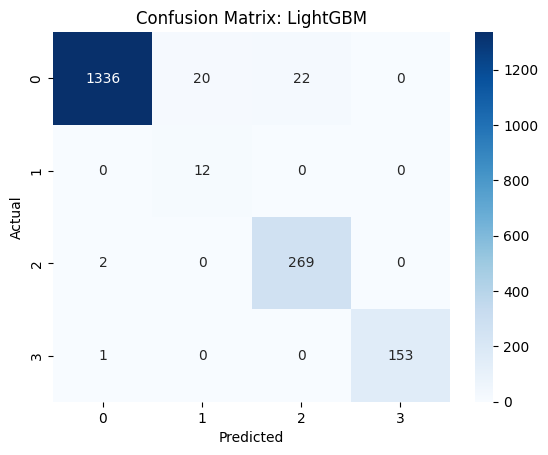

In [ ]:
print("\nConfusion Matrices:")
for model, metrics in results.items():
    print(f"\n{model}:")
    print(metrics['confusion_matrix'])
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {model}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Step 10: Comparison Table

In [ ]:
comparison_df = pd.DataFrame({
    model: {
        'Accuracy': metrics['accuracy'],
        'Precision': metrics['classification_report']['weighted avg']['precision'],
        'Recall': metrics['classification_report']['weighted avg']['recall'],
        'F1-Score': metrics['classification_report']['weighted avg']['f1-score']
    } for model, metrics in results.items()
}).T
print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
                        Accuracy  Precision    Recall  F1-Score
Logistic Regression     0.741598   0.939922  0.741598  0.819424
Random Forest           0.976860   0.983524  0.976860  0.979045
Support Vector Machine  0.758127   0.949863  0.758127  0.833641
LightGBM                0.975207   0.982879  0.975207  0.977767


Step 11: Visualizing Results

1. Comparison Bar Chart

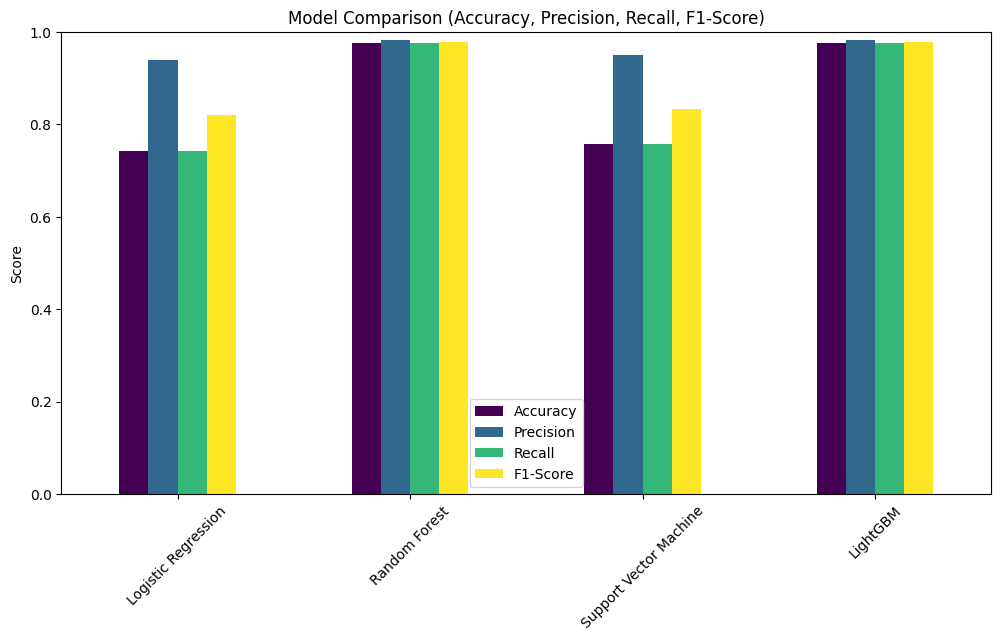

In [ ]:
comparison_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Model Comparison (Accuracy, Precision, Recall, F1-Score)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

2. Accuracy Comparison Line Plot

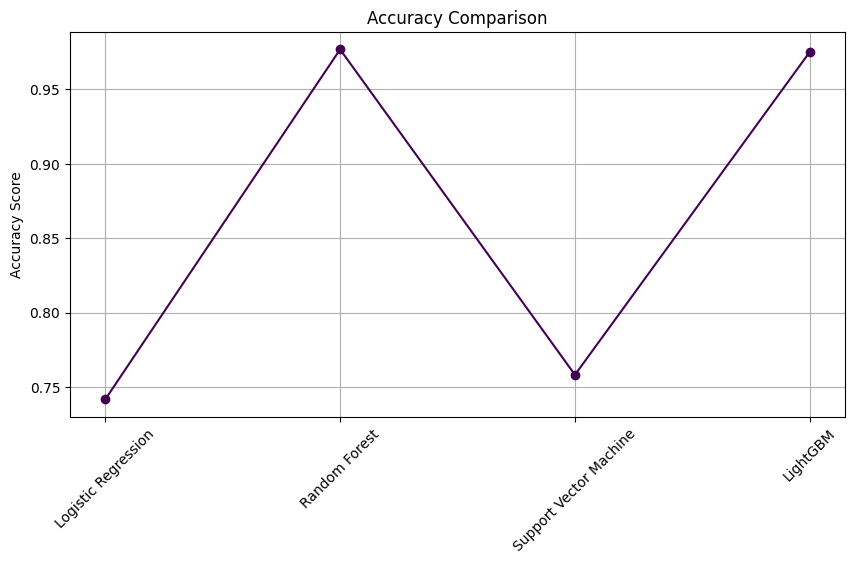

In [ ]:
accuracy_scores = comparison_df['Accuracy']
accuracy_scores.plot(kind='line', marker='o', figsize=(10, 5), title='Accuracy Comparison', colormap='viridis')
plt.ylabel("Accuracy Score")
plt.xticks(range(len(accuracy_scores)), accuracy_scores.index, rotation=45)
plt.grid()
plt.show()

3. Feature Importances (Random Forest)

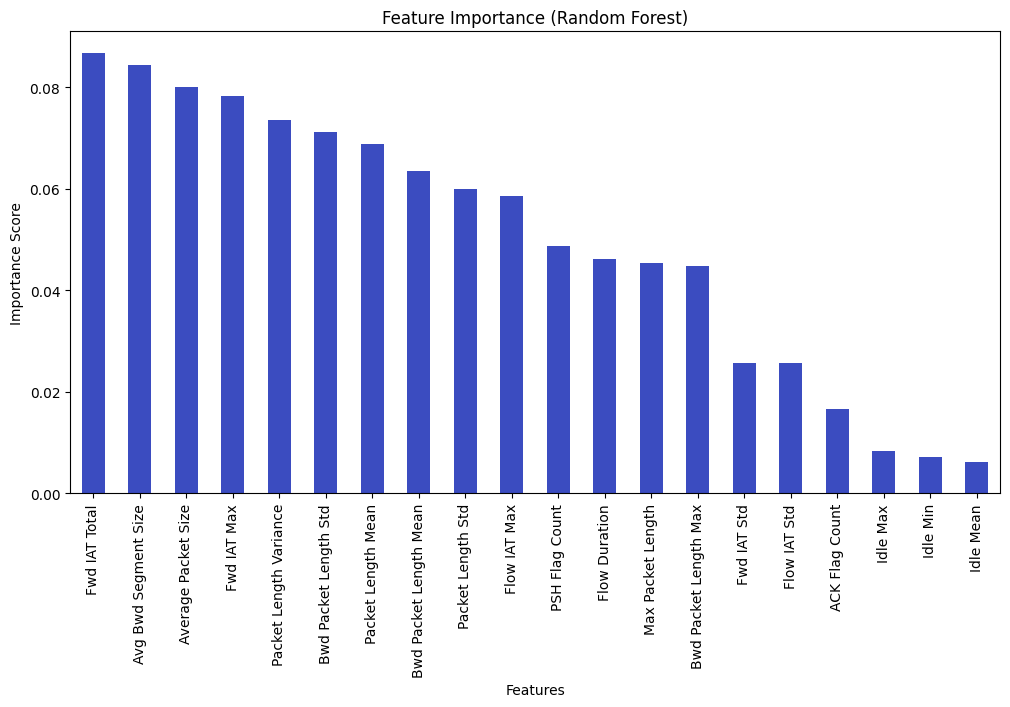

In [ ]:
feature_importances = pd.Series(rf.feature_importances_, index=selected_features_kbest).sort_values(ascending=False)
feature_importances.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

4. Precision-Recall Heatmap

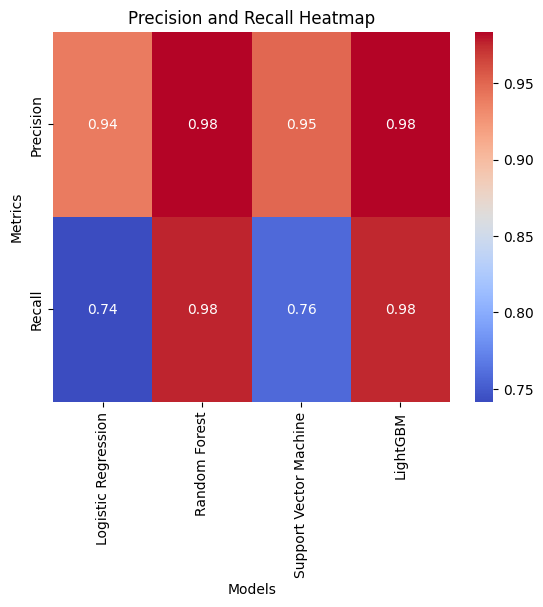

In [ ]:
precision_recall_df = comparison_df[['Precision', 'Recall']].T
sns.heatmap(precision_recall_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Precision and Recall Heatmap")
plt.ylabel("Metrics")
plt.xlabel("Models")
plt.show()